In [8]:
%reload_ext autoreload
%autoreload 2

import os
import shutil
from pathlib import Path
from typing import List

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

from visualisation import render_plot
from depthmap import Depthmap

In [10]:
TOOLKIT_DIR = Path(os.getcwd()).absolute()
TOOLKIT_DIR

Path('/Users/markus/Development/cgm/cgm-ml/src/common/depthmap_toolkit')

In [70]:
depthmap_dir = TOOLKIT_DIR / 'tests' / 'huawei_p40pro'
depthmap_fname = 'depth_dog_1622182020448_100_234.depth'
rgb_fname = 'rgb_dog_1622182020448_100_234.jpg'
calibration_file = TOOLKIT_DIR / 'tests' / 'huawei_p40pro' / 'camera_calibration.txt'

In [59]:
depthmap_fnames = list(map(lambda x: x.name, depthmap_dir.rglob('*.depth')))
rgb_fnames = list(map(lambda x: x.name, depthmap_dir.rglob('*.jpg')))
# TODO assert same length and order

In [60]:
dmaps = []
dmaps_visualizations = []
for depthmap_fname, rgb_fname in zip(depthmap_fnames, rgb_fnames):
    print(depthmap_fname)
    print(rgb_fname)
    dmap = Depthmap.create_from_file(str(depthmap_dir), str(depthmap_fname), str(rgb_fname), str(calibration_file))
    dmaps.append(dmap)
    print(dmap)
    dmaps_visualizations.append(render_plot(dmap))  # takes 5 seconds each time

depth_dog_1622182020448_100_240.depth
rgb_dog_1622182020448_100_234.jpg


2021-06-18 17:02:36,033 - INFO - height=0.433781m - /Users/markus/Development/cgm/cgm-ml/src/common/depthmap_toolkit/visualisation.py: line 99


depth_dog_1622182020448_100_246.depth
rgb_dog_1622182020448_100_240.jpg


2021-06-18 17:02:42,993 - INFO - height=0.434632m - /Users/markus/Development/cgm/cgm-ml/src/common/depthmap_toolkit/visualisation.py: line 99


depth_dog_1622182020448_100_234.depth
rgb_dog_1622182020448_100_246.jpg


2021-06-18 17:02:49,775 - INFO - height=0.435327m - /Users/markus/Development/cgm/cgm-ml/src/common/depthmap_toolkit/visualisation.py: line 99


In [63]:
dmaps_visualizations[0].shape

(240, 900, 3)

In [62]:
# floor = dmap.get_floor_level()
# mask, highest = dmap.detect_child(floor)
# child_height_in_m = highest - floor

In [53]:
# angle_in_degrees = dmap.get_angle_between_camera_and_floor()

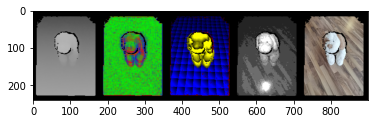

In [64]:
# fig = plt.figure()
plt.imshow(dmaps_visualizations[0])
plt.show()

In [82]:
def trigger_visualization(artifact_idx):
    plt.imshow(dmaps_visualizations[artifact_idx])
    plt.show()
interact(trigger_visualization, artifact_idx = (0,2), );

interactive(children=(IntSlider(value=1, description='artifact_idx', max=2), Output()), _dom_classes=('widget-…

In [181]:
def trigger_visualization(artifact_idx):
    plt.imshow(dmaps_visualizations[artifact_idx])
    plt.show()
    
def on_button_clicked(b):
    with button_output:
        print(f"Button clicked.{str(button_output)}")

ui_xmax = widgets.IntSlider(description='artifact_idx', value=0, min=0, max=2);
plot_out = widgets.interactive_output(trigger_visualization, {'artifact_idx': ui_xmax});
display(widgets.VBox([ui_xmax, plot_out, button], layout=Layout(width='50%')))

In [134]:
# export_obj_button = widgets.Button(description="Export OBJ!")
# button_output = widgets.Output()
# display(export_obj_button, button_output)
# export_obj_button.on_click(on_button_clicked)

In [111]:
# type(output)

ipywidgets.widgets.widget_output.Output

In [107]:
# type(plot_out)

ipywidgets.widgets.widget_output.Output

In [135]:
# class DateInput():
#     def __init__(self, 
#                  year = "e.g. '2017'", 
#                  month = "e.g. '05'", 
#                  day = "e.g. '21'"
#                 ):
#         self.year = widgets.Text(description = 'Year',value = year)
#         self.month = widgets.Text(description = 'Month',value = month)
#         self.day = widgets.Text(description = 'Day',value = day)        
#         self.year.on_submit(self.handle_submit)
#         self.year.on_submit(self.handle_submit)
#         self.year.on_submit(self.handle_submit)
#         display(self.year, self.month, self.day)

#     def handle_submit(self, text):
#         self.v = text.value
#         return self.v

# print("enter the year, month and day above, then press return in any field")
# my_object = DateInput()

In [136]:
# my_object.year.value

In [168]:
type(dmaps_visualizations[0])

numpy.ndarray

In [184]:
class Viz():
    def __init__(self, images: List[np.array]):
        assert isinstance(images, List)
        self.images = images
        self.num_artifacts = len(images)
        self.setup_ui()
        
    def setup_ui(self):
        self.ui_xmax = widgets.IntSlider(description='artifact_idx', value=0, min=0, max=self.num_artifacts)
        self.plot_out = widgets.interactive_output(self.trigger_visualization, {'artifact_idx': self.ui_xmax})
        self.export_obj_button = widgets.Button(description="Export OBJ!")
        self.export_obj_button.on_click(self.on_button_clicked)
        self.message_textbox = widgets.Text(description='empty')

        display(self.ui_xmax)
        display(self.plot_out);
        display(self.export_obj_button);
        display(self.message_textbox)
        
    def trigger_visualization(self, artifact_idx):
        plt.imshow(self.images[artifact_idx])
        plt.show()

    def on_button_clicked(self, b):
        print(str(f'abc {self.ui_xmax.value}'))
        self.message_textbox.value = str(f'abc {self.ui_xmax.value}')

print("See the cu")
viz = Viz(images=dmaps_visualizations)

See the cu


IntSlider(value=0, description='artifact_idx', max=3)

Output()

Button(description='Export OBJ!', style=ButtonStyle())

Text(value='', description='empty')

In [161]:
viz.ui_xmax.value

1